# CA1 Part A: Classification

![mushrooms](./assets/img/mushrooms_bg.jpg)

**Background**

This  data  set  includes  descriptions  of  hypothetical  samples  corresponding  to  23  species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). 

<p style="font-size: 12pt; font-weight: bold"> Each species  is  identified  as  definitely  edible,  definitely  poisonous,  or  of  unknown  edibility and not recommended. </p>

This latter class was combined with the poisonous one. <br> The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

** Task **

1. Write the code to solve the prediction task.
2. **In the Jupyter notebook**, write your report detailing your implementation your experiments and analysis.

---

## Getting started

For the first step, I will be import some relevant libraries which might be useful for me to handle the data and create some visualisations. Furthermore, I will import pandas profiling to do a rough profiling and sklearn for machine learning.

\## Data Maipulation

- **numpy**: support for multi dimensional arrays
- **pandas**: data manipulation tool

\## Exploratory Data Analysis
- **pandas_profling**: quick EDA report generator

\## Data Visualisation
- **matplotlib**: baseline plotting library
- **seaborn**: high-level plotting library based on matplotlib


In [2]:
# Data Manipulation
import numpy as np
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
# Misc
import os
from warnings import filterwarnings

In [3]:
# Updating on local environtment (Google Colab is outdated)
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
# EDA Report
from pandas_profiling import ProfileReport

Requirement already up-to-date: pandas-profiling[notebook] in d:\anaconda3_v2\lib\site-packages (3.0.0)
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [4]:
# Installing on local environment (Google Colab does not have this library)
!pip install -U yellowbrick

Requirement already up-to-date: yellowbrick in d:\anaconda3_v2\lib\site-packages (1.3.post1)


In [5]:
# Pipeline
from sklearn.pipeline import Pipeline
# Model_Selection
from sklearn.model_selection import (
    cross_val_score,
    GridSearchCV,
    cross_val_predict
)
# Classification Metrics
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    accuracy_score,
    f1_score,
    roc_auc_score,
    classification_report,
    plot_roc_curve,
    make_scorer
)
# Model Evaluation Visualisations
from yellowbrick.classifier import (
    ConfusionMatrix,
    ROCAUC
)
from yellowbrick.model_selection import (
    LearningCurve,
    FeatureImportances,
    ValidationCurve
)
from sklearn.tree import plot_tree
# Classification Models
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC


## The Prediction Task

\## **How is the prediction task defined?**

Our prediction task is to create a machine learning model to predict a mushroom edibility, edible or poisonous, based on the mushroom's features.

\## **What is the meaning of the output variable?**

The output variable is a two class label - edible or poisonous. Edible (e) is defined the mushroom would cause no hard when consumed; whereas poisonous (p) refers to the mushroom will cause harmful effects when eaten.

\## **The data**

The class is followed by 22 varying characteristics of the mushroom.

- Number of Instances: 8124
- Number of Attributes: 22 (all nominally valued - according to the metadata)
- Missing Attributes: denoted by "?"
- Class Distribution: 
    - edible: 4208 (51.8%)
    - poisonous: 3916 (48.2%)
    - total: 8124 instances

In [6]:
# Columns Names as the header is not included in the dataset
col_name = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

# Reading .csv file, the metadata states that missing data are labelled as '?'
mushrooms = pd.read_csv('./assets/mushroom/agaricus-lepiota_data.csv', names=col_name, na_values='?')
mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [7]:
try:
    mushrooms['class'] = mushrooms['class'].apply(lambda x: 'edible' if x == 'e' else 'poisonous')
    display(mushrooms)
except:
    display(mushrooms)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,edible,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,edible,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,poisonous,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,edible,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,edible,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,edible,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,poisonous,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


---

## Exploratory Data Analysis

> <i>"If you torture the data long enougb, it will confess to anything"</i> ~ Ronald Coarse

Why do we conduct EDA (Exploratory Data Analysis)? It helps to grasp a better understanding of our dataset by summarising their features/characteristics. Usually, EDA revolves around creating data visualisation and conducting statistical tests.



### 1. Data Structure and distribution

Questions to Answer:
- How many features is in the dataset?
- How many observation is in the dataset?
- What is the data type of each feature?
- Are there missing/null values in the dataset?

In [8]:
# retrieve number of missing data type, shape, and data-type
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

**Observation**
- 8124 rows, 23 columns
- every columns are `objects` -> Categorical Data
- only column 'stalk-root' contains missing data

In [9]:
# display descriptive statistics
mushrooms.describe().T

,count,unique,top,freq
class,8124,2,edible,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


** Observation: **

- some columns have large number of classes (> 6), gotta check for association


### 2. Data Profiling

In order to get some awareness in the dataset, I will be using `pandas_profiling` library to do a profile on the dataset to check for any issues.

p.s. for better viewability, I have exported the profile to a `.html` file under `/assets`, it would be advised to view in browser instead of the notebook.

In [10]:
# Create and Display the report
profile = ProfileReport(mushrooms, orange_mode=True)
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


In [11]:
# export profile to .html
os.makedirs('./assets/profile', exist_ok=True)
profile.to_file('./assets/profile/mushroom_profile.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 62.74it/s]


**Observation**

- most/all of the columns contains categorical data
    - encode the data during preprocessing
- 'veil-type' contains only one type of value 'p' -> zero variance
    - dropping constant feature as it does not describe the mushroom properly
- 'stalk-root' has 30.5% missing data
    - impute or drop column, since there are more than 30% of the data missing

### 3. Uncertaintity coefficient (Theil's U) - Univariate Feature Selection

Since all the variable are categorical-nominal data, I will be using `Uncertaintity coefficient`, also known as `Theil's U` to measure for nominal association. We would want to investigate if certain features has more association to the mushroom's `class`.

What is Uncertaintity Coefficient?

Uncertaintity Coefficient / proficiency / entropy coefficient / Theil's U is a statistical test, similar to Chi Square and Cremer's V, to measure association between nominal data.

Formula: $U(X|Y) = \frac {H(X) - H(X|Y)} {H(X)} = \frac {I(X;Y)} {H(X)}$

![Venn Diagram](./assets/img/venn.png)

`Theil's U` provides a coefficient range between 0 to 1, where 0 means lack of association to `class`, and 1 has more association to `class`. (Zychlinski, 2019)

Reference:

- Zychlinski, S. (2019, December 26). The Search for Categorical Correlation. Medium. https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9. 


In [12]:
# Libraries and Functions for Computating Theil's U
from collections import Counter
import math
import scipy.stats as ss

# calculating conditional entropy
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

# calculates U statistics
def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

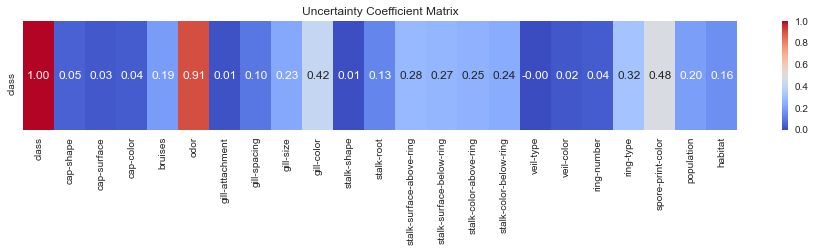

In [13]:
# creating a dataframe placeholder
theilu = pd.DataFrame(index=['class'], columns=mushrooms.columns)
columns = mushrooms.columns
# getting theil_u value with respect to `class`
for j in range(0,len(columns)):
    u = theil_u(mushrooms['class'].tolist(), mushrooms[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
theilu.fillna(value=np.nan, inplace=True)
# plotting out correlation map
fig, ax = plt.subplots(figsize=(16, 2))
sns.heatmap(theilu, annot=True, fmt='.2f', vmin=0, vmax=1, cmap='coolwarm', ax=ax)
ax.set_title("Uncertainty Coefficient Matrix")
plt.show()

In [14]:
# subsetting columns which are less than 0.05
theilu[theilu < 0.1].dropna(axis=1).columns.tolist()

['cap-shape',
 'cap-surface',
 'cap-color',
 'gill-attachment',
 'stalk-shape',
 'veil-type',
 'veil-color',
 'ring-number']

** Observation **

- 'cap-shape', 'cap-surface', 'cap-color', 'gill-attachment', 'stalk-shape', 'veil-type', 'veil-color', 'ring-number' has low association with `class`
- `odor` has very high association with `class`, $U = 0.91$

### 4. Imputing and Dropping Redundant Columns

Things to be done here:
- dropping columns with low association with `class` as they probably are not good features for model selection
- imputing with most frequent value for each column as `stalk-root` has 30% missing information

In [15]:
# Getting columns name where U-statistics is smaller than 0.05
drop_col = theilu[theilu < 0.05].dropna(axis=1).columns.tolist()
theilu[theilu < 0.05].dropna(axis=1)

,cap-shape,cap-surface,cap-color,gill-attachment,stalk-shape,veil-type,veil-color,ring-number
class,0.048842,0.028617,0.036083,0.014178,0.007524,-1.603208e-16,0.023839,0.038489


In [16]:
# creating dataframe and drop columns
df = mushrooms.drop(drop_col, axis=1)
df.fillna(df.mode().iloc[0])
df.columns.to_list()

['class',
 'bruises',
 'odor',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [17]:
# filling with mode
df.fillna(df.mode().iloc[0], inplace=True)
df.isna().sum()

class                       0
bruises                     0
odor                        0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### How do you represent your data as features?

After exploring and conducting tests on the data, I deem these columns to be suitable to be used as features for model selection.

 'bruises',
 'odor',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat'

 Below shows an overview of the features.

In [18]:
df.drop('class', axis=1).head()

,bruises,odor,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,t,p,c,n,k,e,s,s,w,w,p,k,s,u
1,t,a,c,b,k,c,s,s,w,w,p,n,n,g
2,t,l,c,b,n,c,s,s,w,w,p,n,n,m
3,t,p,c,n,n,e,s,s,w,w,p,k,s,u
4,f,n,w,b,k,e,s,s,w,w,e,n,a,g


---

## Feature Engineering / Preprocessing

> extracting features from their domain; in summary, preparing the data before modelling

### Did you process the features in any way?
I will be first partitioning the data into training (70%) and testing set (30%). You may ask why 7:3 ratio, the reason being this dataset is particularly small (8124 observations), I think it is necessary to have more data allocated to the testing set to evaluate the model better. 

Futhermore, since all of the features is categorical-nominal data, I will be using One-Hot Encoding throughout all of the features. 

Since there are no quantitative features, no scaling (Z-Score Standardisation or MinMax Normalisation) is required.

**List of Techniques used for this dataset**

1. Data Partition
2. Categorical Encoding
3. Column Transformer

In [19]:
# train_test_split
from sklearn.model_selection import train_test_split
# Encoder
from sklearn.preprocessing import (
    OneHotEncoder,
    LabelEncoder
)
# Column Transformer
from sklearn.compose import ColumnTransformer

In [20]:
# defining features, X, and target variable, y
X = df.drop(columns='class')
y = df['class']
print(X.shape, y.shape)

(8124, 14) (8124,)


### 1. Data Partition

I will be doing Data Partitioning, aka train_test_split, first to prevent any data leakage to the testing set in the further steps. As mentioned above, I will be spltting the data to 7:3 ratio.

In [21]:
# using sklearn method to split the data into training (.7) and testing (.3) set
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y, test_size=.3, random_state=42)
print(X_train.shape, y_train_p.shape)
print(X_test.shape, y_test_p.shape)

(5686, 14) (5686,)
(2438, 14) (2438,)


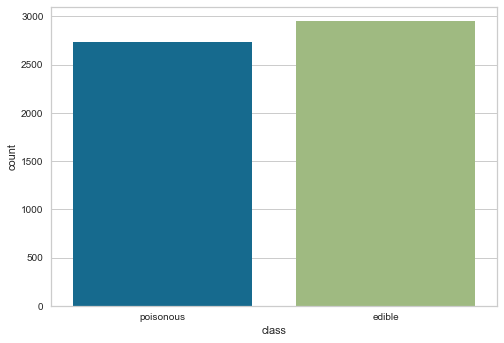

In [22]:
# checking the distribution of classes in the target variable
sns.countplot(x=y_train_p)
plt.show()
# As we can see, the classes 'p' and 'e' are quite close to each other in terms of frequency. I don't think any class balancing is needed.

### 2. Categorical Encoding

I will be using the `OneHotEncoder` and `LabelEncoding` method from `sklearn.preprocessing`. Why not pd.get_dummies() and make my life easier, you may ask? In my opinion, I think using sklearn version will be easier to integrate into a data pipeline later on.

In [23]:
# Initiate OneHotEncoder
onehot = OneHotEncoder(drop='first', sparse=False)
# Fitting to Training Data and Apply Transfomation
onehot.fit(X_train)
# Getting Feature names
X_feature_name = onehot.get_feature_names(X_train.columns)
# Applying Transformation on training and testing sets
X_train_encode = pd.DataFrame(onehot.transform(X_train), columns=X_feature_name)
X_test_encode  = pd.DataFrame(onehot.transform(X_train), columns=X_feature_name)
X_train_encode.head()

,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-spacing_w,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Initiate label encoder
label_encoder = LabelEncoder()
# Fitting to Training Data and Apply Transfomation
y_train = label_encoder.fit_transform(y_train_p)
y_test = label_encoder.transform(y_test_p)
label_encoder.classes_

array(['edible', 'poisonous'], dtype=object)

### 3. Column Transformer

I am creating a column transformer as a function to make column transformation more easier in the later process, in case I want to add more code.

In [25]:
# Creating Column
col_transform = ColumnTransformer(
    transformers=[
        ("Label Encoder", onehot, X_train.columns)
    ], remainder='passthrough'
)

---

## Model Selection

Finally the fun part, model selection. They say an average data scientist spends 60% of their time cleaning and orgnanising the data, I'm glad that part is over Lol.

My plan for model selection is to run the data through some models and deem the best model based on metrics and explainability.

In [26]:
# Initate Classifiers
models = [
    ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=0)),
    ('RandomForestClassifier', RandomForestClassifier(random_state=0)),
    ('AdaBoostClassifier', AdaBoostClassifier(random_state=0)),
    ('LogisticRegression', LogisticRegression(random_state=0)),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=0)),
    ('Perceptron', Perceptron(random_state=0)),
    ('Linear SVC', SVC(random_state=0, kernel='linear')),
    ('Polynomial SVC', SVC(random_state=0, kernel='poly')),
    ('RBF SVC', SVC(random_state=0, kernel='rbf')),
    ('Sigmoid SVC', SVC(random_state=0, kernel='sigmoid'))
]

### Pseudo Lazy Predict

By right, I wanted to use this library called `lazypredict` where I can run through 30 models with only 3 lines of code. However, the requirement stated that I am not allowed to install additional third party machine learning libraries such as auto-sklearn. As such, I decided to implement my own version of Lazy Predict.

Reference: https://lazypredict.readthedocs.io/en/latest/readme.html

I will be using `Mean Cross-Validation Score` as the main metric for me to select the model. To ensure a fair test, I will be setting random seed to 0 and exclude any other hyperparameters. 

In [27]:
def modelling(X_train, y_train, models):
    # placeholder
    out = []
    # running through each model
    for name, model in models:
        # creating temporary pipeline
        temp_pipeline = Pipeline(
            steps = [
                ('Column Transformer', col_transform),
                (name, model)
            ]
        )
        # training model
        temp_pipeline.fit(X_train, y_train)
        # cross validate and record scores
        score = cross_val_score(temp_pipeline, X_train, y_train, cv=5)
        s = list(score)
        s.append(score.mean())
        out.append(s)
    # Creating and sorting DataFrame
    df = pd.DataFrame(
        out, index=[name for name, models in models], 
        columns=['1st Fold', '2nd Fold', '3rd Fold', '4th Fold', '5th Fold', 'Mean Cross-Validation Score']
    )
    df.sort_values(by='Mean Cross-Validation Score', inplace=True, ascending=False)
    return df

# display scores
model_score = modelling(X_train, y_train, models)
model_score

,1st Fold,2nd Fold,3rd Fold,4th Fold,5th Fold,Mean Cross-Validation Score
DecisionTreeClassifier,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
RandomForestClassifier,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
AdaBoostClassifier,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
GradientBoostingClassifier,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
Perceptron,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
Linear SVC,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
Polynomial SVC,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
KNeighborsClassifier,1.000000,1.00000,1.000000,1.000000,0.997361,0.999472
RBF SVC,1.000000,1.00000,1.000000,1.000000,0.997361,0.999472
LogisticRegression,1.000000,1.00000,0.998241,1.000000,0.997361,0.999120


** Observation **

- DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, and Perceptron performs equally well with 100% mean cross-validation of 5 folds, F1

** How did you select which learning algorithms to use? **

As all of the models stated above have 100% mean cross validation score. Since there is a dilemna in choosing models, I decided to go with the simplest model with the best explainability, as such DecisionTreeClassifier.

### Initiate Decision Tree Classifier with Default Hyperparameters



In [28]:
# Creating a model based on the pipeline
CART = Pipeline(
    steps=[
        ("Column Transformer", col_transform),
        ("DecisionTreeClassifier", DecisionTreeClassifier(random_state=0))
    ]
)
# Fitting and Predicting
CART.fit(X_train, y_train)
pred = CART.predict(X_test)
print(classification_report(y_test, pred, digits=3))
# Cross Validation
scores = cross_val_score(CART, X_train, y_train, cv=5)
print('Cross Validation Scores: {}'.format(scores))
print('Mean Cross Validation Scores: {}'.format(scores.mean()))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      1257
           1      1.000     1.000     1.000      1181

    accuracy                          1.000      2438
   macro avg      1.000     1.000     1.000      2438
weighted avg      1.000     1.000     1.000      2438

Cross Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross Validation Scores: 1.0


**Observation**

- 1.0 in F1-Score indicates that the predictions based on the testing set are true
- 1.0 mean accuracy score on training set indicates that the model can perform accurate prediction on new data

### Creating a Stupid Baseline Model

A baseline model is simple and interpretable, easy to infer upon. I am going to use DummyClassifier as a stupid baseline to benchmark against my system later on.

stratified: generates predictions by respecting the training set’s class distribution. 

In [29]:
# Creating a model based on the pipeline
stupid = Pipeline(
    steps=[
        ("Column Transformer", col_transform),
        ("model", DummyClassifier(random_state=0, strategy='uniform'))
    ]
)
# Fitting and Predicting
stupid.fit(X_train, y_train)
pred = stupid.predict(X_test)
print(classification_report(y_test, pred, digits=3))
# Cross Validation
scores = cross_val_score(stupid, X_train, y_train, cv=5)
print('Cross Validation Scores: {}'.format(scores))
print('Mean Cross Validation Scores: {}'.format(scores.mean()))

              precision    recall  f1-score   support

           0      0.528     0.502     0.515      1257
           1      0.497     0.523     0.510      1181

    accuracy                          0.512      2438
   macro avg      0.513     0.513     0.512      2438
weighted avg      0.513     0.512     0.512      2438

Cross Validation Scores: [0.4771529  0.50395778 0.51451187 0.5057168  0.49164468]
Mean Cross Validation Scores: 0.4985968068777794


** Observation **

- precision and recall are quite similar to each other, f1-score is balanced
- 0.512 F1 score indicates that the model is performing very badly (typical F1 score)
- 0.499 mean cross validation score indicates the model performs very badly on new data

### Comparing Decision Trees to the Stupid baseline

Now I want to benchmark the model I want to use against the baseline I have set up.

I will be using the following visualisations for comparison:
- Confusion Matrix
- Learning Curve

Disclaimer: `yellowbrick` is not a machine learning library, merely a library to help evaluate machine learning models

In [30]:
#### Confusion Matrix with Cross Validation

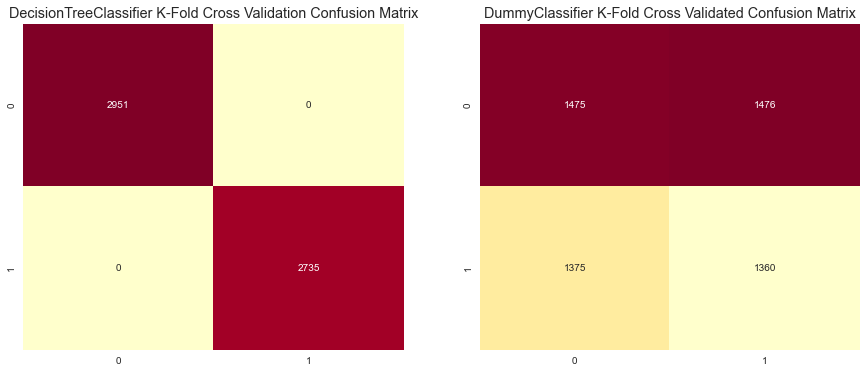

In [31]:
# Cross Validating Confusion Matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

with plt.style.context('ggplot'):
    # DecisionTreeClassifier
    cart_cm = confusion_matrix(y_train, cross_val_predict(CART, X_train, y_train, cv=5))
    sns.heatmap(cart_cm, annot=True, fmt='', ax=ax1, cbar=False, cmap='YlOrRd')
    ax1.set_title('DecisionTreeClassifier K-Fold Cross Validation Confusion Matrix')
    # Baseline
    stupid_cm = confusion_matrix(y_train, cross_val_predict(stupid, X_train, y_train, cv=5))
    sns.heatmap(stupid_cm, annot=True, fmt='', ax=ax2, cbar=False, cmap='YlOrRd')
    ax2.set_title('DummyClassifier K-Fold Cross Validated Confusion Matrix')


**Observation**
- DecisionTreeClassifier is performing very well with k-fold cross validation, with no false predictions
- we can see the cross validation score are all over the place for DummyClassifier

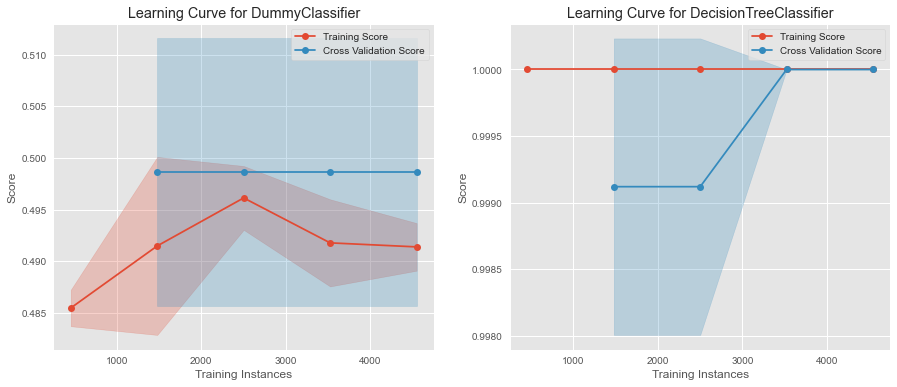

In [32]:
import warnings
warnings.filterwarnings('ignore')

with plt.style.context('ggplot'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plotting out Confusion Matrix - DummyClassifier
    stupid_lc = LearningCurve(stupid, ax=ax1, fontsize=12, cv=5, n_jobs=4)
    stupid_lc.fit(X_train, y_train)
    stupid_lc.finalize()

    # Plotting out Confusion Matrix - DecisionTree
    cart_lc = LearningCurve(CART, ax=ax2, fontsize=12, cv=5, n_jobs=4)
    cart_lc.fit(X_train, y_train)
    cart_lc.finalize()

    plt.show()

** Observation **

- DummyClassifier has a very low accuracy at it's training score, indicating the model is severely underfitting
- no gap between training and cross-validation score indicating that DecisionTreeClassifier is a good fit on 3.5k training instance onwards
- some gap in the DecisionTreeClassifier when there is very little training instances, resulting to variance problem, aka overfitting

---

---

## Hyperparameter Tuning and Evaluation - DecisionTreeClassifier

![tree](./assets/img/tree_strucutre.jpg)

Source: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

Did you try to tune the hyper parameters of the learning algorithm, and in that case how?

I am going to use GridSearchCV to run through the parameters to get the model with the best F1-score (binary classes). Since we are using DecisionTreeClassifier, I will be listing down the parameters that I will be tuning.

- criterion - measure the quality of the split
- max_depth - maximum depth of the tree, basically how big can the tree grow
- max_feature - number of features to consider when looking for the best split
- max_leaf_nodes - stopping criteria for number of leaves

QNA
- Why not I set `None` for max_depth? Reason being I might risk the model overfitting when the model meets unseen data if I set to `None`.
- Why do I still want to do Hyperparameter Tuning even though my model has a very high accuracy? I want to find the most optimal parameters without making my model too complex, which might overfit when coming to unseen data.

Source: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [33]:
# Displaying all Hyperparameters for DecisionTreeClassifier
list(DecisionTreeClassifier().get_params().keys())

['ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'random_state',
 'splitter']

### GridSearchCV

In [34]:
filterwarnings('ignore')
# Create the parameter grid based on the results of random search
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(5, 11),
    'max_leaf_nodes': np.arange(10, 16),
    'max_features': np.arange(10, 21),
}
# Creating a model based on the pipeline
grid_search = Pipeline(
    steps=[
        ("Column Transformer", col_transform),
        ("GridSearchCV", GridSearchCV(
            DecisionTreeClassifier(random_state=0, min_samples_split=2, min_samples_leaf=1),
            params_grid,
            cv=5,
            verbose=2,
            n_jobs=4,
            scoring='accuracy'
            )
        )
    ]
)
# Fitting Model
grid_search.fit(X_train, y_train)
print(grid_search.named_steps['GridSearchCV'].best_estimator_)
print(grid_search.named_steps['GridSearchCV'].best_params_)
print(grid_search.named_steps['GridSearchCV'].best_score_)

Fitting 5 folds for each of 792 candidates, totalling 3960 fits
DecisionTreeClassifier(max_depth=7, max_features=10, max_leaf_nodes=14,
                       random_state=0)
{'criterion': 'gini', 'max_depth': 7, 'max_features': 10, 'max_leaf_nodes': 14}
1.0


### Validation Curve



Validation curves visualizes the performace metrics over a range of values for a hyperparameters

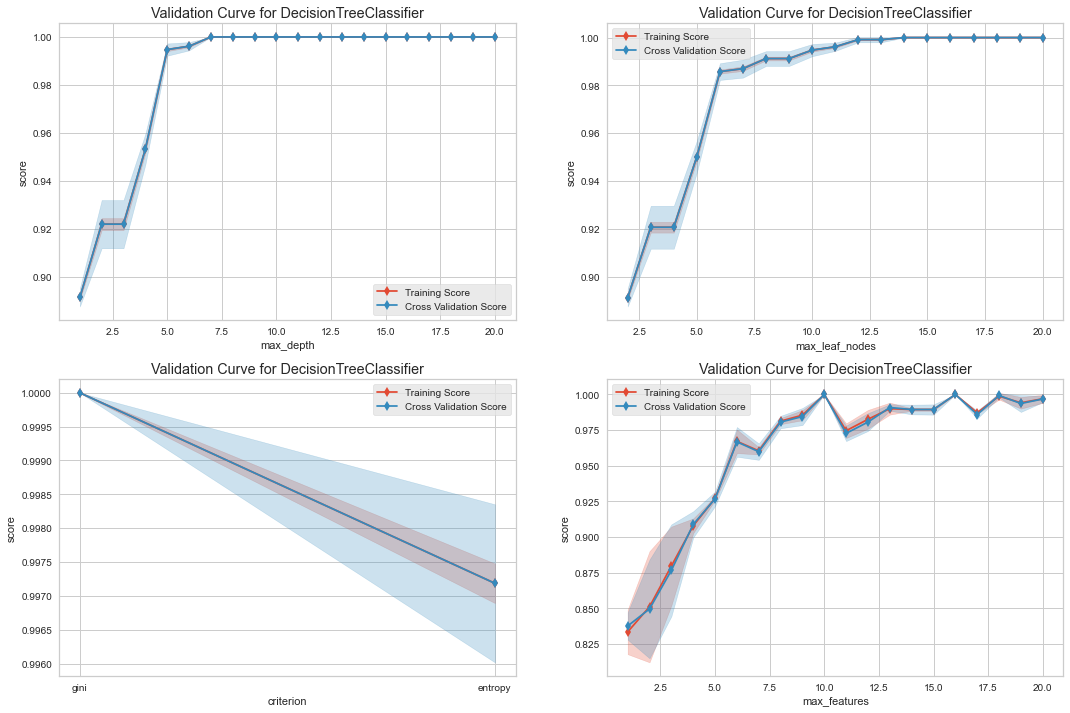

In [35]:
# validating curve
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))
with plt.style.context('ggplot'):
    # max depth
    max_d = ValidationCurve(grid_search.named_steps['GridSearchCV'].best_estimator_, 'max_depth', np.arange(1, 21), cv=5, n_jobs=4, ax=ax1)
    max_d.fit(col_transform.transform(X_train), y_train)
    max_d.finalize()
    # max_leaf_nodes
    max_l = ValidationCurve(grid_search.named_steps['GridSearchCV'].best_estimator_, 'max_leaf_nodes', np.arange(1, 21), cv=5, n_jobs=4, ax=ax2)
    max_l.fit(col_transform.transform(X_train), y_train)
    max_l.finalize()
    # criterion
    criteria = ValidationCurve(grid_search.named_steps['GridSearchCV'].best_estimator_, 'criterion', ['gini', "entropy"], cv=5, n_jobs=4, ax=ax3)
    criteria.fit(col_transform.transform(X_train), y_train)
    criteria.finalize()
    # max_feature
    max_f = ValidationCurve(grid_search.named_steps['GridSearchCV'].best_estimator_, 'max_features', np.arange(1, 21), cv=5, n_jobs=4, ax=ax4)
    max_f.fit(col_transform.transform(X_train), y_train)
    max_f.finalize()

plt.show()

**Observations**
training score matches the cross validation score for all curves
- max_depth: we can see from 7 onwards the accuracy score reaches its peak and maintain its accuracy
- max_leaf_node: we can see that from 14 onwards the accuracy score reaches its peak and maintain its accuracy
- criterion: gini is better than entropy in terms of accuracy
- max_feature: very varying results based on the number of features, there are two instances where accuracy score peaks, 10 and 16

### Initiate model with Hyperparameters

Model:
- DecisionTreeClassifier(max_depth=7, max_features=10, max_leaf_nodes=14, random_state=0)

Parameters:
- {'criterion': 'gini', 'max_depth': 7, 'max_features': 10, 'max_leaf_nodes': 14}

In [36]:
# Creating a model based on the pipeline
model_tuned = Pipeline(
    steps=[
        ("Column Transformer", col_transform),
        ("DecisionTreeClassifier", DecisionTreeClassifier(max_depth=7, max_features=10, max_leaf_nodes=14, random_state=0))
    ]
)
# Fitting and Predicting
model_tuned.fit(X_train, y_train)
pred = model_tuned.predict(X_test)
print(classification_report(y_test, pred, digits=3))
# Cross Validation
scores = cross_val_score(model_tuned, X_train, y_train)
print('Cross Validation Scores: {}'.format(scores))
print('Mean Cross Validation Scores: {}'.format(scores.mean()))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      1257
           1      1.000     1.000     1.000      1181

    accuracy                          1.000      2438
   macro avg      1.000     1.000     1.000      2438
weighted avg      1.000     1.000     1.000      2438

Cross Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross Validation Scores: 1.0


** Observations **
- 100% accuracy in predictions
- 100% accuracy in cross validation

### Confusion Matrix and Receiving Operating Characteristics Curve

Receiving Operating Characteristics Curve: shows the true positive and false positive rate for every probability threshold of a binary classifier

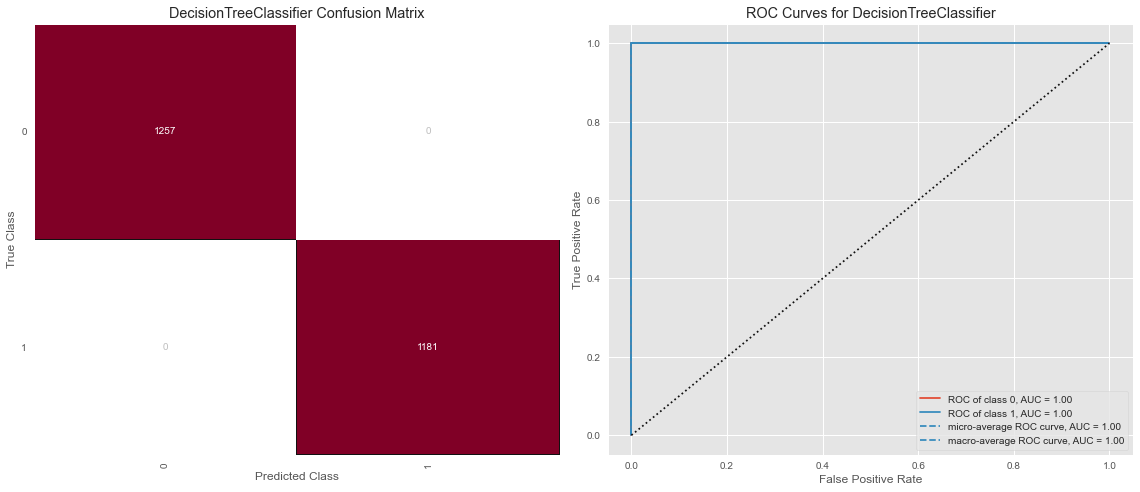

In [37]:
with plt.style.context('ggplot'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), tight_layout=True)
    # Confusion Metrics
    cm_t = ConfusionMatrix(model_tuned, ax=ax1)
    cm_t.fit(X_train, y_train)
    cm_t.score(X_test, y_test)
    cm_t.finalize()
    # ROC
    roc_t = ROCAUC(model_tuned, ax=ax2)
    roc_t.fit(X_train, y_train)
    roc_t.score(X_test, y_test)
    roc_t.finalize()
    ax2.set_ylim(-0.05, 1.05)
    ax2.set_xlim(-0.05, 1.05)

** Observations **

Can  you  say  anything  about  the  errors  that  the  system  makes?
- the confusion matrix shows that the model makes no false predictions, false positive and false negative
- roc shows the area under curve to be 1.0, means the model has maximises it true positive rate

### Learning Curve

Learning Curve is used to visualise the effect of the number of observations on the performance metric.

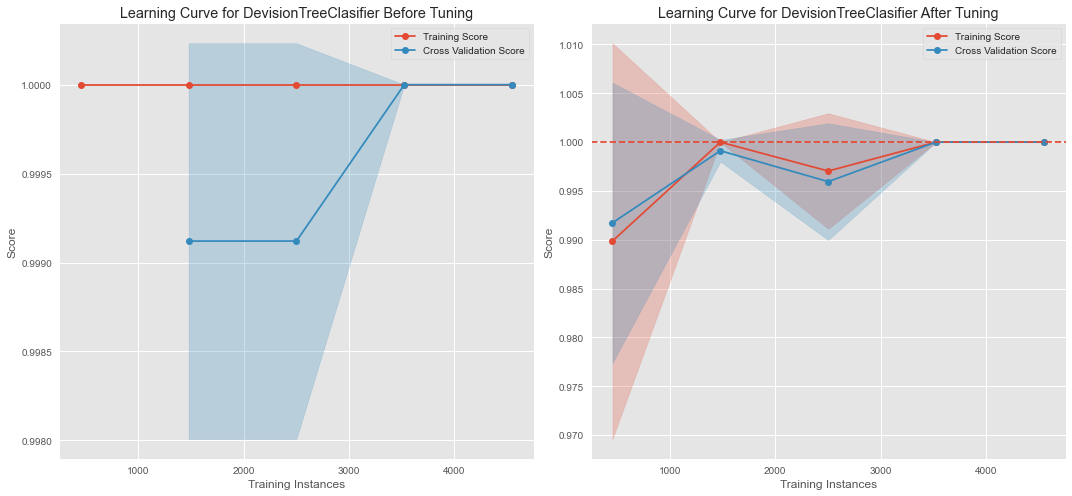

In [38]:
# Plotting out Learning Curve
# Disclaimer: This is not a machine learning library, merely a library to help evaluate machine learning models
filterwarnings('ignore')
with plt.style.context('ggplot'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7), tight_layout=True)
    # Plotting out Confusion Matrix - DecisionTree
    cart_lc = LearningCurve(CART, fontsize=12, cv=5, ax=ax1)
    cart_lc.fit(X_train, y_train)
    cart_lc.finalize()
    ax1.set_title('Learning Curve for DevisionTreeClasifier Before Tuning')

    lc_t = LearningCurve(model_tuned.named_steps['DecisionTreeClassifier'], cv=5, fontsize=12, ax=ax2)
    lc_t.fit(col_transform.transform(X_train), y_train)
    lc_t.finalize()
    ax2.axhline(y=1, linestyle='--')
    ax2.set_title('Learning Curve for DevisionTreeClasifier After Tuning')

    plt.show()

** Observation **

- smaller gap between training score and cross validation score compared to the previous learning curve shows that the model is overfitting less
- overall, the model is a good fit at all training instances

---

## Interpreting the Model - DecisionTreeClassifier

![](./assets/img/dikw.png)

For every business (not sure why would a mushroom business would want to hire a data scientist), we would want to find reasoning/logic behind our data. This will later support us to make relevant insights and widoms to make better business decisions.

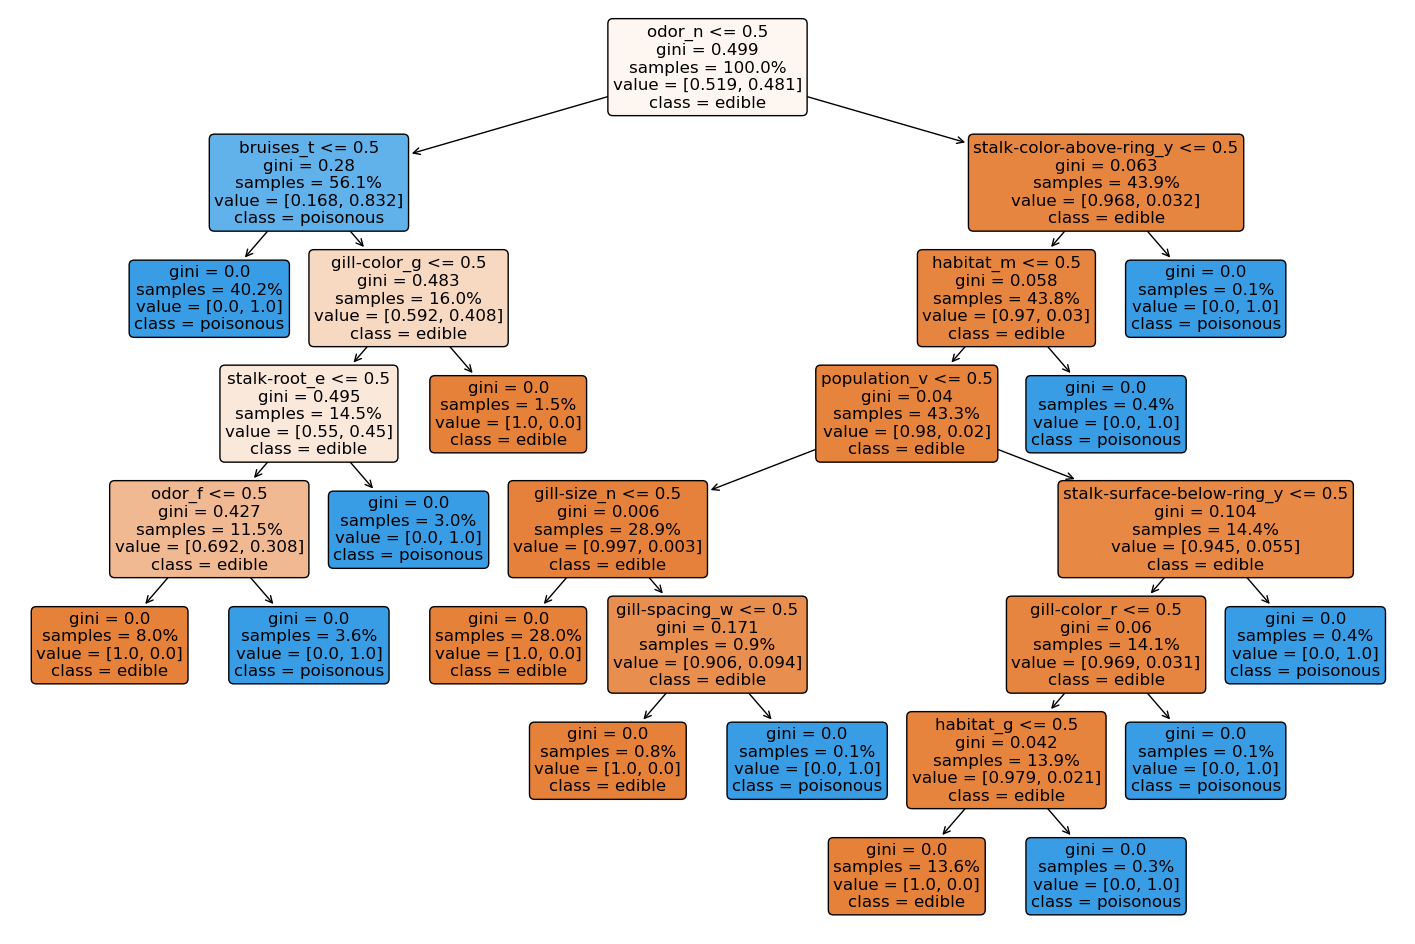

In [39]:
# plotting out decision tree
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(18, 12))
    plot_tree(model_tuned.named_steps['DecisionTreeClassifier'], filled=True, ax=ax, feature_names=X_feature_name, fontsize=12, class_names=label_encoder.classes_, proportion=True, rounded=True)
    plt.show()

** Observation **
- at the root node: odor_none makes the biggest decision in the tree, if the the there is no odor (odor_n = 1) the mushroom is likely to be edible, else poisonous
- bruises_t = 0, makes the second biggest decision, about 40% of the test data ends up in the leaf node
    - bruises_t=0, mushroom sample does not have any bruises high likely mushroom sample is poisonous

### Feature Importance

Normalized total reduction of criteria by feature (Gini importance)

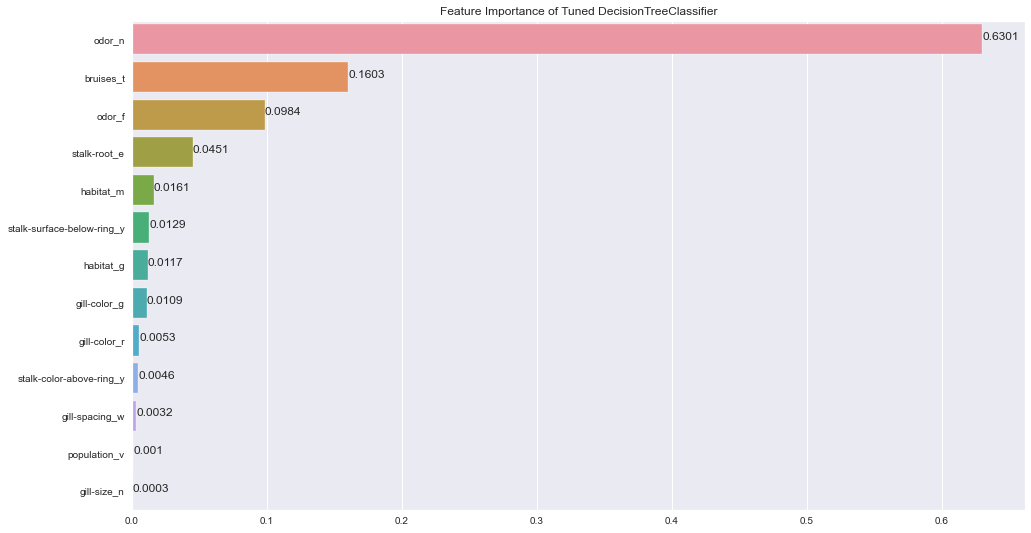

In [41]:
# Creating Feature Importance
importance = pd.Series(model_tuned.named_steps['DecisionTreeClassifier'].feature_importances_, index=X_feature_name).sort_values(ascending=False)
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(16, 9))
    sns.barplot(x=importance[importance > 0].values, y=importance[importance > 0].index, ax=ax)
    ax.set_title('Feature Importance of Tuned {}'.format('DecisionTreeClassifier'))
    [ax.text(x=v, y=i, s=round(v, 4)) for i, v in zip(np.arange(0, len(importance)), importance[importance>0].values)]
    # for i, v in zip(np.arange(0, len(importance)), importance[importance>0].values):
    #     ax.text(x=v, y=i, s=round(v, 4))
plt.show()

In [42]:
# listing down significant features
list(importance[importance > 0].index)

['odor_n',
 'bruises_t',
 'odor_f',
 'stalk-root_e',
 'habitat_m',
 'stalk-surface-below-ring_y',
 'habitat_g',
 'gill-color_g',
 'gill-color_r',
 'stalk-color-above-ring_y',
 'gill-spacing_w',
 'population_v',
 'gill-size_n']

** Observation **

Is it possible to say something about which features the model considers important?
- These features are relevant in determining the edibility of a mushroom
    - 'odor_n',
 'bruises_t',
 'odor_f',
 'stalk-root_e',
 'habitat_m',
 'stalk-surface-below-ring_y',
 'habitat_g',
 'gill-color_g',
 'gill-color_r',
 'stalk-color-above-ring_y',
 'gill-spacing_w',
 'population_v',
 'gill-size_n'
- Most significant feature in determining a mushroom sample edibility is odor_n

---

## Exporting Model

In [43]:
import pickle
os.makedirs('./assets/models', exist_ok=True)
with open('./assets/models/mushroom_model.pkl', 'wb') as file:
    pickle.dump(model_tuned, file)

---

## Forenote

I think definitely the most defining factor to checking a mushroom edibility is their odor and whether having bruises. Now, I am more likely to survive on an Island filled with only Mushrooms, Lol.

I would like to say I spent almost 5 weeks (Week 1 - Week 5) on Part A of the assignment. The difficulty I found in this prediction task was handling a great number of categorical-nominal data, which made me spent time researching on statistical measures to use. Furthermore, I have learnt more on topics such as Model Selection, Evaluation, and Improvement.